<a href="https://colab.research.google.com/github/bhar-gav/topic-specific-analysis-of-sentences/blob/main/data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



***- - -  TOPIC SPECIFIC ANALYSIS OF SENTENCES  - - -***


```
BHARGAV - 21DCS022

Github link: https://github.com/bhar-gav/topic-specific-analysis-of-sentences.git
```

---
**OVERVIEW**  

</t>Topic-specific analysis focuses on extracting insights related to a specific subject within text.

## Key Aspects

1. **Topic Modeling**:
   - Clusters sentences based on shared themes (e.g., **LDA**).
   - Identifies predominant topics.

2. **Keyword Extraction**:
   - Extracts significant words or phrases (e.g., TF-IDF).
   - Summarizes main subjects.

3. **Sentiment Analysis**:
   - Assesses emotional tone (e.g., using TextBlob).
   - Gauges public opinion on issues.

4. **Named Entity Recognition (NER)**:
   - Identifies key entities (people, organizations).
   - Extracts relevant information.

5. **Thematic Analysis**:
   - Codes and identifies recurring themes.
   - Provides deeper insights into discussions.

6. **Contextual Analysis**:
   - Analyzes sentences within their surrounding context.
   - Understands topic framing.

7. **Comparative Analysis**:
   - Compares how different texts discuss the same topic.
   - Identifies perspective differences.

## Applications
- **Market Research**: Consumer sentiment analysis.
- **Social Media**: Public reaction assessment.
- **Academic Research**: Literature review insights.

## Tools and Techniques
- **NLP Libraries**: NLTK, spaCy, Gensim for analysis.
- **Visualization**: Matplotlib, Seaborn for trend visualization.

This analysis provides targeted insights valuable for research and decision-making.






---


**DATA ANALYSIS**

---



In [2]:
from google.colab import drive
drive.mount("/content/drive")

import os
print(os.getcwd())
datasets="/content/drive/My Drive/Colab Notebooks/final-year/sentence-analysis/"
os.chdir(datasets)
print(os.getcwd())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content
/content/drive/My Drive/Colab Notebooks/final-year/sentence-analysis




---


**DATASET 1 : us-general-debates (1989-2015)<br>
DATASET 2 : science-articles published in news<br>
DATASET 3 : environment-articles<br>
DATASET 4 : sports-articles**


---



In [3]:
import pandas as pd

df1=pd.read_csv("datasets/un-general-debates.csv")
df2=pd.read_json("datasets/science-articles.json")
df3=pd.read_json("datasets/environment-articles.json")
df4=pd.read_json("datasets/sports-articles.json")

dfs=[df1,df2,df3,df4]
dataset_names=["UN Speeches","Science Articles","Environment Articles","Sports Articles"]



---


**DATASET STRUCTURES**


---



In [54]:

for i, df in enumerate(dfs, start=1):
    print("\n" + "="*50 + "\n")  #  separator for better readability
    print(f"DATASET {i} Information:")
    print("\n" + "="*50 + "\n")  #  separator for better readability

    print("\nHead:")
    print(df.head())

    print("\nShape:")
    print(df.shape)

    print("\nSummary statistics:")
    print(df.describe())

    print("\nMissing value check:")
    print(df.isnull().sum())

    print("\nData types:")
    print(df.dtypes)

    print("\nInfo:")
    print(df.info())






DATASET 1 Information:



Head:
   session  year country                                               text
0       44  1989     MDV  ﻿It is indeed a pleasure for me and the member...
1       44  1989     FIN  ﻿\nMay I begin by congratulating you. Sir, on ...
2       44  1989     NER  ﻿\nMr. President, it is a particular pleasure ...
3       44  1989     URY  ﻿\nDuring the debate at the fortieth session o...
4       44  1989     ZWE  ﻿I should like at the outset to express my del...

Shape:
(7507, 4)

Summary statistics:
           session         year
count  7507.000000  7507.000000
mean     49.610763  1994.610763
std      12.892155    12.892155
min      25.000000  1970.000000
25%      39.000000  1984.000000
50%      51.000000  1996.000000
75%      61.000000  2006.000000
max      70.000000  2015.000000

Missing value check:
session    0
year       0
country    0
text       0
dtype: int64

Data types:
session     int64
year        int64
country    object
text       object
dtype: obje



---


**DETAILED INFO -**


---



## Dataset 1: UN Speeches
- **Structure:**
  - **Dimensions:** 7507 entries, 4 columns
  - **Columns:**
    - `session` (int64)
    - `year` (int64)
    - `country` (object)
    - `text` (object)
- **Missing Entries:** None (0 null values)
- **Data Types:**
  - `session`: int64
  - `year`: int64
  - `country`: object
  - `text`: object
- **Mean Values:**
  - Mean `session`: 49.61
  - Mean `year`: 1994.61

---

## Dataset 2: HuffPost Science Articles
- **Structure:**
  - **Dimensions:** 2206 entries, 7 columns
  - **Columns:**
    - `link` (object)
    - `headline` (object)
    - `category` (object)
    - `short_description` (object)
    - `authors` (object)
    - `date` (datetime64)
    - `article_text` (object)
- **Missing Entries:** 78 in `article_text`
- **Data Types:**
  - `link`: object
  - `headline`: object
  - `category`: object
  - `short_description`: object
  - `authors`: object
  - `date`: datetime64[ns]
  - `article_text`: object
- **Mean Values:**
  - Mean `date`: 2014-11-14 06:47:58

---

## Dataset 3: HuffPost Environment Articles
- **Structure:**
  - **Dimensions:** 1444 entries, 7 columns
  - **Columns:**
    - `link` (object)
    - `headline` (object)
    - `category` (object)
    - `short_description` (object)
    - `authors` (object)
    - `date` (datetime64)
    - `article_text` (object)
- **Missing Entries:** 205 in `article_text`
- **Data Types:**
  - `link`: object
  - `headline`: object
  - `category`: object
  - `short_description`: object
  - `authors`: object
  - `date`: datetime64[ns]
  - `article_text`: object
- **Mean Values:**
  - Mean `date`: 2013-11-19 14:19:36

---

## Dataset 4: HuffPost Sports Articles
- **Structure:**
  - **Dimensions:** 2000 entries, 7 columns
  - **Columns:**
    - `link` (object)
    - `headline` (object)
    - `category` (object)
    - `short_description` (object)
    - `authors` (object)
    - `date` (datetime64)
    - `article_text` (object)
- **Missing Entries:** 56 in `article_text`
- **Data Types:**
  - `link`: object
  - `headline`: object
  - `category`: object
  - `short_description`: object
  - `authors`: object
  - `date`: datetime64[ns]
  - `article_text`: object
- **Mean Values:**
  - Mean `date`: 2017-06-19 04:48:43


---

```
#EXTRACTED INFO ABOUT DATASETS FROM OUTPUT
```


---


**Visual Representation of Text Data**


---

The word clouds generated from each dataset provide a compelling visual summary of the text data. Each cloud illustrates the most frequently mentioned words, allowing for a quick assessment of key themes and topics.

### Key Themes and Topics

- **Prominent Words**: The size of each word indicates its frequency within the dataset. Larger words are more commonly used, highlighting the primary subjects discussed.
  
- **Language Use**: The word clouds reflect the specific language and terminology relevant to each dataset, helping identify the target audience or content focus.

- **Insights**: These visualizations enable a rapid understanding of the overarching themes in the datasets, facilitating exploratory analysis and data-driven decision-making.


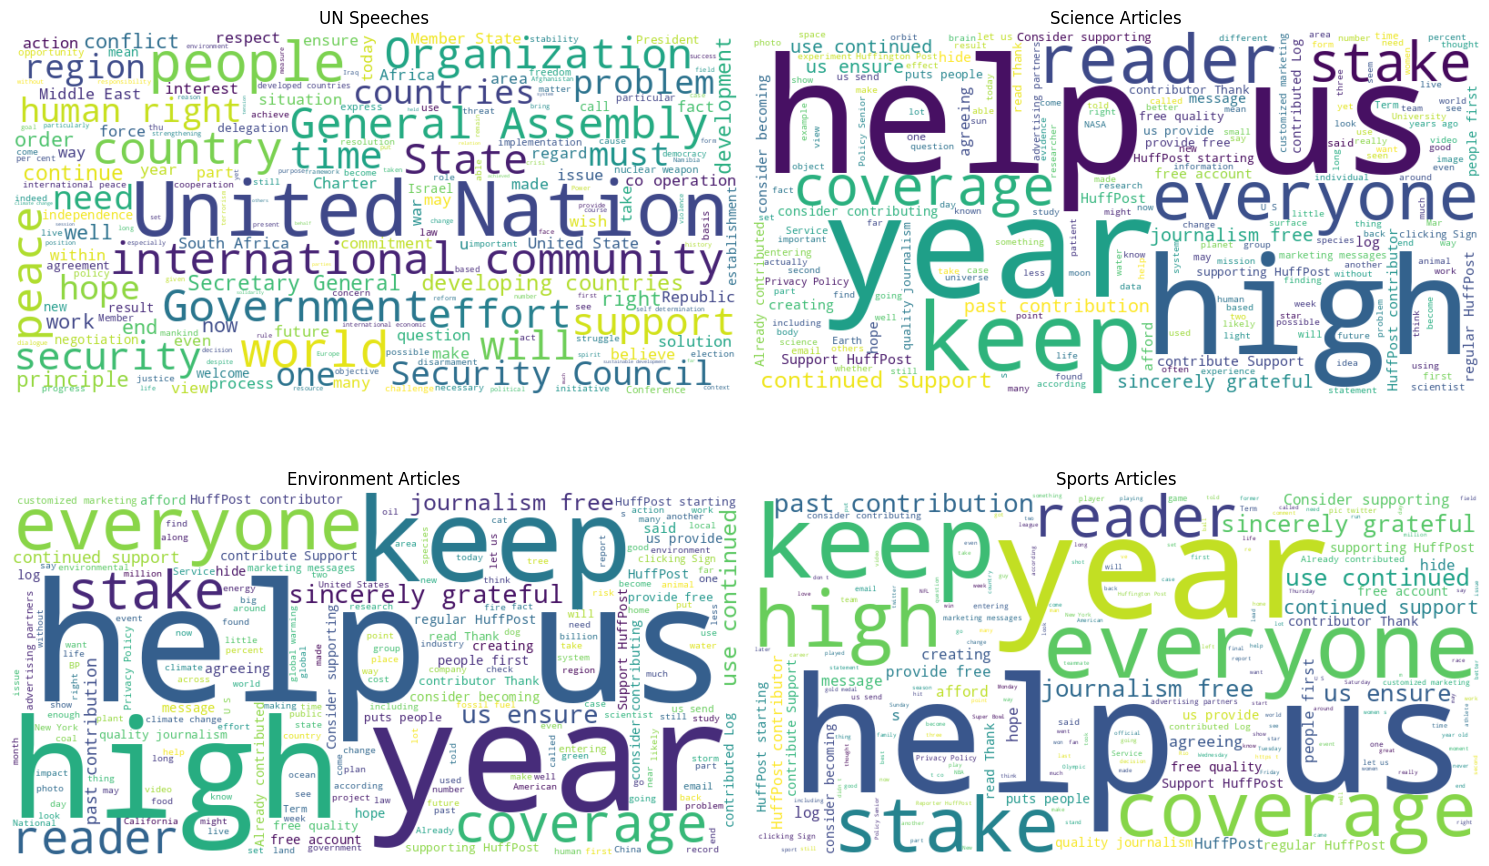

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

datasets= dfs

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()  # Flatten the 2D array of axes to 1D

for i, df in enumerate(dfs):
    # Combine all text into a single string
    text_data = " ".join(df['text'].dropna()) if 'text' in df.columns else " ".join(df['article_text'].dropna())

    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

    # Display the word cloud
    axes[i].imshow(wordcloud, interpolation='bilinear')
    axes[i].axis('off')
    axes[i].set_title(dataset_names[i])

plt.tight_layout()
plt.show()




---


---



 **1. Frequency Distribution of Words**


---

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
<ipython-input-5-57f2001cf0b7>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(words, rotation=45)


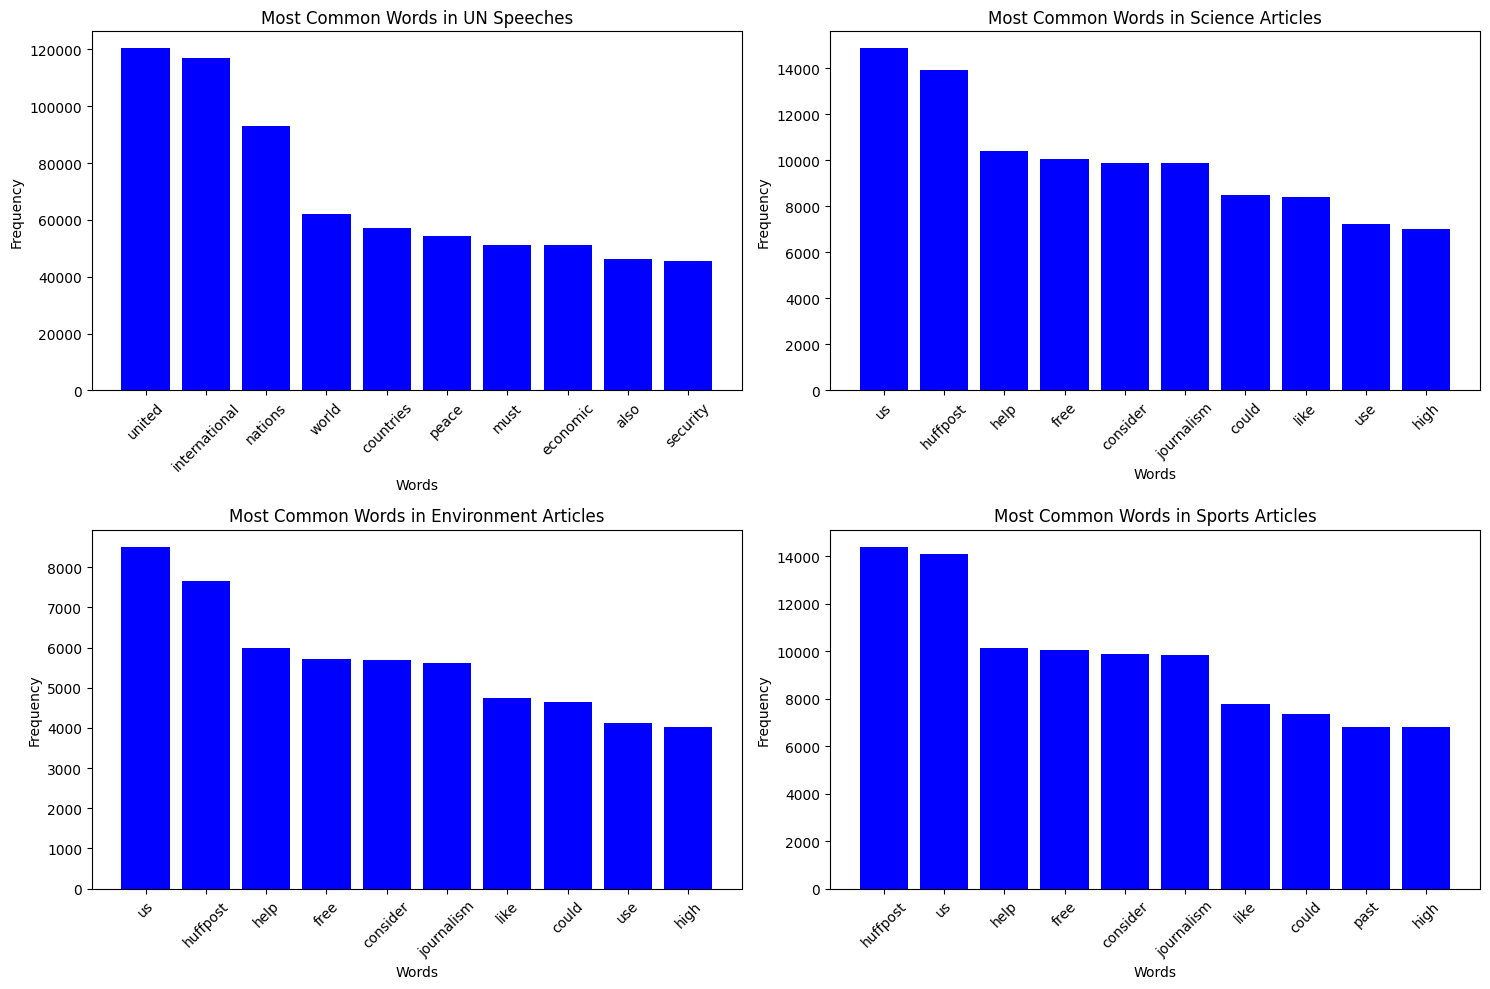

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def plot_word_frequency(df, dataset_name, ax):
    text_data = " ".join(df['text'].dropna()) if 'text' in df.columns else " ".join(df['article_text'].dropna())
    words = text_data.split()
    words = [word.lower() for word in words if word.isalnum() and word.lower() not in stop_words]
    word_counts = Counter(words).most_common(10)

    words, counts = zip(*word_counts)

    ax.bar(words, counts, color='blue')
    ax.set_title(f'Most Common Words in {dataset_name}')
    ax.set_xlabel('Words')
    ax.set_ylabel('Frequency')
    ax.set_xticklabels(words, rotation=45)

# Create subplots
num_datasets = len(dfs)
cols = 2
rows = (num_datasets + cols - 1) // cols  # Calculate number of rows needed

fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
axes = axes.flatten()  # Flatten the axes array for easy indexing

# Plot each dataset
for i, df in enumerate(dfs):
    plot_word_frequency(df, dataset_names[i], axes[i])

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()



---



 **2. Word Cloud with Sentiment Highlighting**


---

In [ ]:
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_sentiment_wordcloud(df, dataset_name):
    text_data = " ".join(df['text'].dropna()) if 'text' in df.columns else " ".join(df['article_text'].dropna())

    positive_words = [word for word in text_data.split() if TextBlob(word).sentiment.polarity > 0]
    negative_words = [word for word in text_data.split() if TextBlob(word).sentiment.polarity < 0]

    positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(positive_words))
    negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(negative_words))

    # Create subplots
    fig, ax = plt.subplots(1, 2, figsize=(15, 7))

    ax[0].imshow(positive_wordcloud, interpolation='bilinear')
    ax[0].axis('off')
    ax[0].set_title(f'Positive Words in {dataset_name}')

    ax[1].imshow(negative_wordcloud, interpolation='bilinear')
    ax[1].axis('off')
    ax[1].set_title(f'Negative Words in {dataset_name}')

    plt.tight_layout()
    plt.show()

# Create subplots for each dataset
for i, df in enumerate(dfs):
    plot_sentiment_wordcloud(df, dataset_names[i])
